In [12]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline

In [14]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
rescaled=ImageDataGenerator(1/255)
train_fed = rescaled.flow_from_directory(
    '/content/gdrive/MyDrive/bunga/databunga/seg_train/segmen_train',
    target_size=(128, 128),  # Ubah menjadi tupel (128, 128)
    batch_size=32,
    class_mode='categorical'
)

test_fed = rescaled.flow_from_directory(
    '/content/gdrive/MyDrive/bunga/databunga/seg_test/segmen_test',
    target_size=(128, 128),  # Ubah menjadi tupel (128, 128)
    batch_size=32,
    class_mode='categorical'
)

Found 12269 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [16]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape= (128,128,3)),
                                  tf.keras.layers.MaxPool2D(2,2),


                                  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),

                                  tf.keras.layers.Flatten(),

                                  tf.keras.layers.Dense(128, activation='relu'),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(6, activation='softmax')
                                  ])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 64)       

In [18]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import h5py

In [20]:
erl_stop= EarlyStopping(monitor= 'val_loss', patience=6, restore_best_weights=True)
mod_chk= ModelCheckpoint(filepath = '/content/gdrive/MyDrive/bunga/databunga/my_model.hdf5' , monitor='val_loss', save_best_only=True)
lr_rate= ReduceLROnPlateau(monitor='val_los', patience=3, factor=0.1)

In [22]:
hist= model.fit(train_fed, shuffle=True, epochs=10, validation_data=test_fed,
                          callbacks=[erl_stop, mod_chk, lr_rate], verbose=2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


384/384 - 1291s - loss: 1.1082 - accuracy: 0.5702 - val_loss: 0.9727 - val_accuracy: 0.6083 - lr: 0.0010 - 1291s/epoch - 3s/step
Epoch 2/10


384/384 - 231s - loss: 0.8804 - accuracy: 0.6785 - val_loss: 0.9030 - val_accuracy: 0.6553 - lr: 0.0010 - 231s/epoch - 603ms/step
Epoch 3/10


384/384 - 234s - loss: 0.7435 - accuracy: 0.7384 - val_loss: 0.7776 - val_accuracy: 0.7080 - lr: 0.0010 - 234s/epoch - 610ms/step
Epoch 4/10


384/384 - 236s - loss: 0.6444 - accuracy: 0.7758 - val_loss: 0.7157 - val_accuracy: 0.7567 - lr: 0.0010 - 236s/epoch - 616ms/step
Epoch 5/10


384/384 - 230s - loss: 0.5857 - accuracy: 0.7962 - val_loss: 0.7750 - val_accuracy: 0.7087 - lr: 0.0010 - 230s/epoch - 600ms/step
Epoch 6/10


384/384 - 241s - loss: 0.5206 - accuracy: 0.8184 - val_loss: 0.7391 - val_accuracy: 0.7237 - lr: 0.0010 - 241s/epoch - 627ms/step
Epoch 7/10


384/384 - 256s - loss: 0.4526 - accuracy: 0.8368 - val_loss: 0.6767 - val_accuracy: 0.7617 - lr: 0.0010 - 256s/epoch - 666ms/step
Epoch 8/10


384/384 - 237s - loss: 0.4197 - accuracy: 0.8489 - val_loss: 0.7803 - val_accuracy: 0.7203 - lr: 0.0010 - 237s/epoch - 618ms/step
Epoch 9/10


384/384 - 239s - loss: 0.3760 - accuracy: 0.8610 - val_loss: 0.6095 - val_accuracy: 0.8110 - lr: 0.0010 - 239s/epoch - 623ms/step
Epoch 10/10


384/384 - 239s - loss: 0.3532 - accuracy: 0.8746 - val_loss: 0.6716 - val_accuracy: 0.7807 - lr: 0.0010 - 239s/epoch - 621ms/step


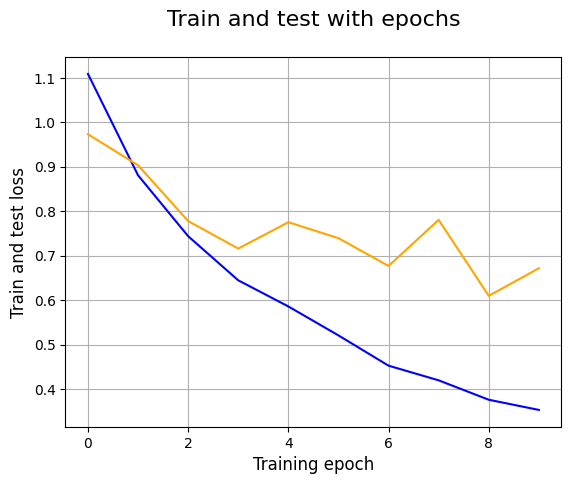

In [23]:
plt.plot(hist.history['loss'], color='blue', label='train')
plt.plot(hist.history['val_loss'], color='orange', label='train')
plt.grid(True)
plt.title("Train and test with epochs\n", fontsize= 16)
plt.xlabel("Training epoch", fontsize= 12)
plt.ylabel("Train and test loss", fontsize= 12)
plt.show()

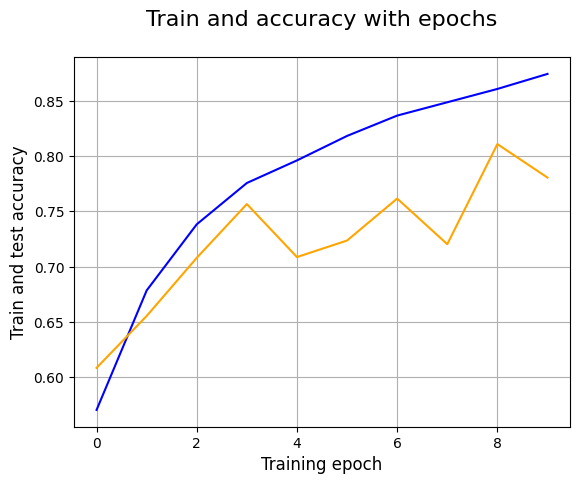

In [24]:
plt.plot(hist.history['accuracy'], color='blue', label='train')
plt.plot(hist.history['val_accuracy'], color='orange', label='train')
plt.grid(True)
plt.title("Train and accuracy with epochs\n", fontsize= 16)
plt.xlabel("Training epoch", fontsize= 12)
plt.ylabel("Train and test accuracy", fontsize= 12)
plt.show()

In [25]:
acc= model.evaluate(test_fed, steps=len(test_fed), verbose=2)
print('%.2f'%(acc[1]*100))

94/94 - 20s - loss: 0.6716 - accuracy: 0.7807 - 20s/epoch - 215ms/step
78.07
